In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
import nltk
from nltk import bigrams
from nltk.collocations import *
import re

# Chargement des données

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In order to access the file, you have to right click on the folder 'REDS' (le lien du drive qui contient les données https://drive.google.com/drive/folders/1FT4lLhX9ZknayVjMnF00PXIynGJCF5S_ rajoute le '_' pour que le lien fonctionne), and then click "Add shortcut to Drive". This will allow you to access the folder from your drive

In [3]:
!ls /content/drive/MyDrive/REDS

 100k_en_toots_labeled.csv   hate_dataset.csv  'Unprocessed toots'


In [4]:
path = "/content/drive/MyDrive/REDS/"

To load for example, the *100k_en_toots_labeled* dataset, for example - Il s'agit du jeu de données pré-processed (100k_en_toots_labeled.csv)

In [5]:
import pandas as pd
k_en_toots_labeled = pd.read_csv(path+"100k_en_toots_labeled.csv", parse_dates=['created_at'])

Je drop la première colonne psk elle ne correspond à rien, c'est simplement la numérotation des lignes que pandas fait déjà (ouvre le csv sur google sheet et tu comprendras mieux)

In [21]:
k_en_toots_labeled.drop(columns = k_en_toots_labeled.columns[0], axis = 1, inplace = True)

In [22]:
k_en_toots_labeled

,id,language,created_at,content,y
0,111716689622320123,en,2024-01-07 21:03:21.708000+00:00,Chikmagalur Tourist Places: Your Ultimate Guid...,0
1,111716689610326246,en,2024-01-07 21:03:16+00:00,"Dancing Adélie Penguins, McMurdo Sound, Antar...",0
2,111716689604989316,en,2024-01-07 21:02:45.688000+00:00,2 Macdonald trip leaving Burrard Station @ Bay...,0
3,111716689599173639,en,2024-01-07 21:03:19+00:00,"Here you go seekers, some more good music (the...",0
4,111716689598556513,hi,2024-01-07 21:01:16+00:00,Reiterating,0
...,...,...,...,...,...
102454,111764948991441974,en,2024-01-16 09:36:21.243000+00:00,Discover how website audience segmentation ca...,0
102455,111764948656465273,de,2024-01-16 09:36:16.882000+00:00,[Non-Food] Promise Babe Matroschka Puppen Kind...,0
102456,111764949225422210,zh,2024-01-16 09:36:23+00:00,NaN,0
102457,111764949218410397,nl,2024-01-16 09:36:23+00:00,Charlie Rouse - Velhos Tempos #JazzDeVille #Ja...,0


In [26]:
# Supprimer les lignes où 'content' est NaN
k_en_toots_labeled.dropna(subset=['content'], inplace=True)
k_en_toots_labeled

,id,language,created_at,content,y
0,111716689622320123,en,2024-01-07 21:03:21.708000+00:00,Chikmagalur Tourist Places: Your Ultimate Guid...,0
1,111716689610326246,en,2024-01-07 21:03:16+00:00,"Dancing Adélie Penguins, McMurdo Sound, Antar...",0
2,111716689604989316,en,2024-01-07 21:02:45.688000+00:00,2 Macdonald trip leaving Burrard Station @ Bay...,0
3,111716689599173639,en,2024-01-07 21:03:19+00:00,"Here you go seekers, some more good music (the...",0
4,111716689598556513,hi,2024-01-07 21:01:16+00:00,Reiterating,0
...,...,...,...,...,...
102453,111764949122293124,fr,2024-01-16 09:36:21+00:00,"[#CaVautLeDétour] Sièges ""A Kiko"", bancs en bo...",0
102454,111764948991441974,en,2024-01-16 09:36:21.243000+00:00,Discover how website audience segmentation ca...,0
102455,111764948656465273,de,2024-01-16 09:36:16.882000+00:00,[Non-Food] Promise Babe Matroschka Puppen Kind...,0
102457,111764949218410397,nl,2024-01-16 09:36:23+00:00,Charlie Rouse - Velhos Tempos #JazzDeVille #Ja...,0


In [13]:
from wordcloud import WordCloud

In [10]:
!pip install pandas matplotlib seaborn wordcloud nltk

# Chronologie des publications

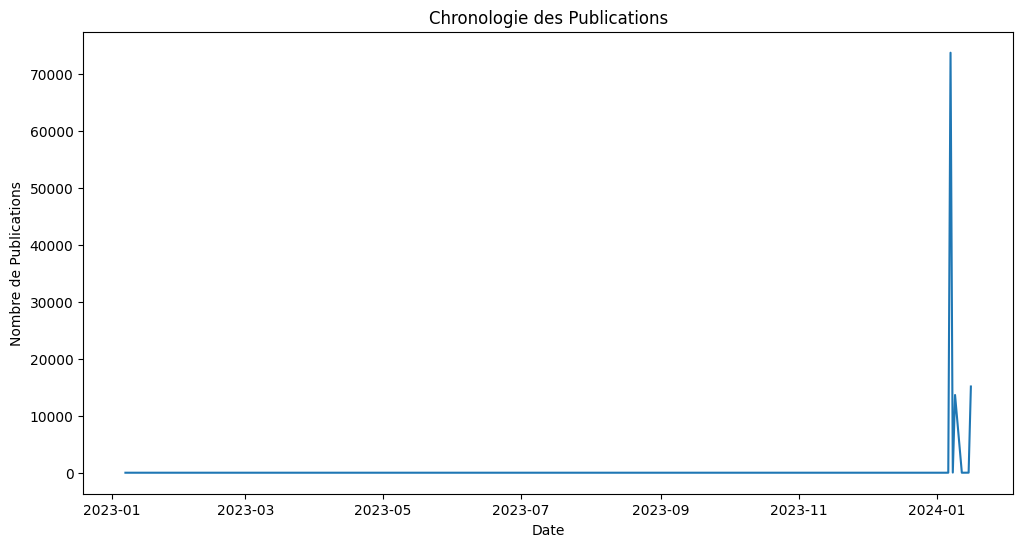

In [23]:
# Groupement par date
timeline = k_en_toots_labeled.groupby(k_en_toots_labeled['created_at'].dt.date).size()

# Visualisation
plt.figure(figsize=(12, 6))
timeline.plot(kind='line')
plt.title('Chronologie des Publications')
plt.xlabel('Date')
plt.ylabel('Nombre de Publications')
plt.show()

# Preprocess des textes

Commençons par voir la distribution de la langue de nos toots

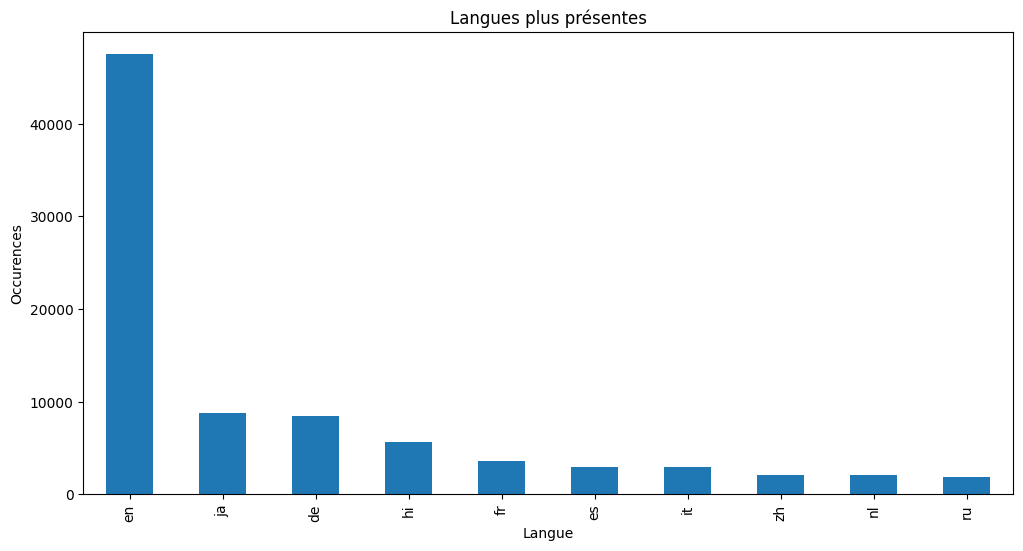

In [24]:
# Groupement par langue
langue = k_en_toots_labeled.groupby('language')['content'].count()

# Visualisation
plt.figure(figsize=(12, 6))
langue.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Langues plus présentes')
plt.xlabel('Langue')
plt.ylabel('Occurences')
plt.show()

L'anglais est la langue pré-dominante => on se focus sur l'anglais

In [9]:
k_en_toots_labeled = k_en_toots_labeled[k_en_toots_labeled['language'] == 'en']
k_en_toots_labeled['content'].head(4)

0    Chikmagalur Tourist Places: Your Ultimate Guid...
1    Dancing Adélie Penguins, McMurdo Sound, Antar...
2    2 Macdonald trip leaving Burrard Station @ Bay...
3    Here you go seekers, some more good music (the...
Name: content, dtype: object

In [10]:
from nltk.stem import WordNetLemmatizer

# Function to remove HTML tags from a string
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

# Apply the function to the 'content' column
k_en_toots_labeled['cleaned_content'] = k_en_toots_labeled['content'].astype(str).apply(remove_html_tags)


# Ensure necessary resources are downloaded
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)

# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
#languages = ['english','french', 'spanish','german']  # Les langues pré-dominantes
#stop_words = set()
#for language in languages:
#    stop_words.update(stopwords.words(language))

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation, numbers, and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    return ' '.join(tokens)

In [11]:
# Apply preprocessing to the cleaned content
k_en_toots_labeled['preprocessed_content'] = k_en_toots_labeled['cleaned_content'].apply(preprocess_text)
k_en_toots_labeled['preprocessed_content'].head(4)

0    chikmagalur tourist place ultimate guide exper...
1    dancing adelie penguin mcmurdo sound antarctic...
2    macdonald trip leaving burrard station bay pm ...
3            go seeker good music second one word yeti
Name: preprocessed_content, dtype: object

# Nuage de mots

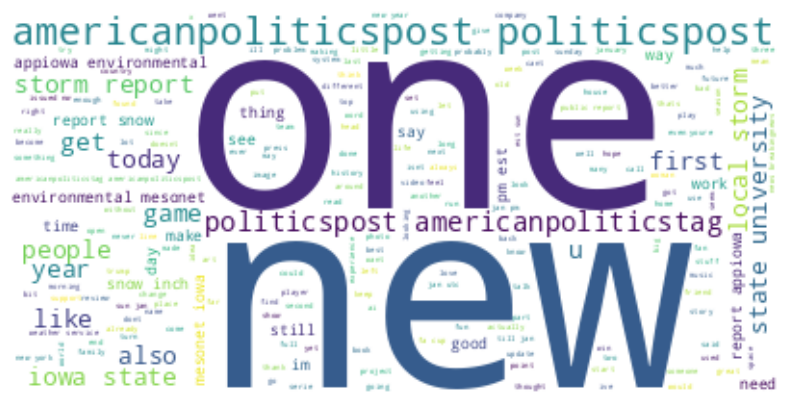

In [14]:
# S'assurer que tous les éléments sont des chaînes de caractères
#k_en_toots_labeled['content'] = k_en_toots_labeled['content'].astype(str)

# Concaténation de tous les textes
text = " ".join(review for review in k_en_toots_labeled.preprocessed_content)

# Génération du nuage de mots
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)

# Visualisation
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Distribution de la colonne 'y'

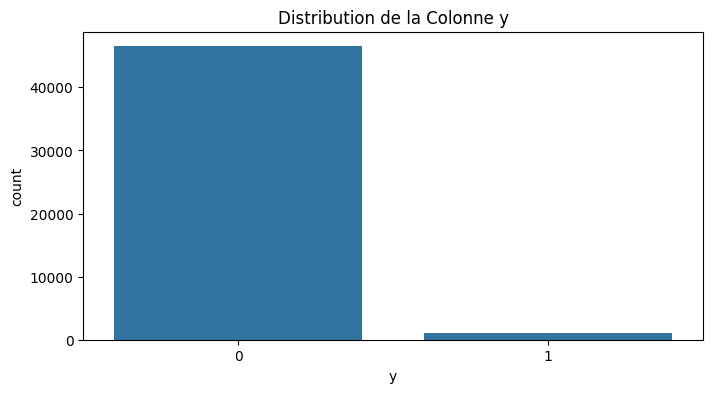

In [15]:
import seaborn as sns

# Visualisation de la distribution de la colonne 'y' => qui représente si le toot
#est offensive ou pas
plt.figure(figsize=(8, 4))
sns.countplot(x='y', data=k_en_toots_labeled)
plt.title('Distribution de la Colonne y')
plt.show()

# Longueur des textes

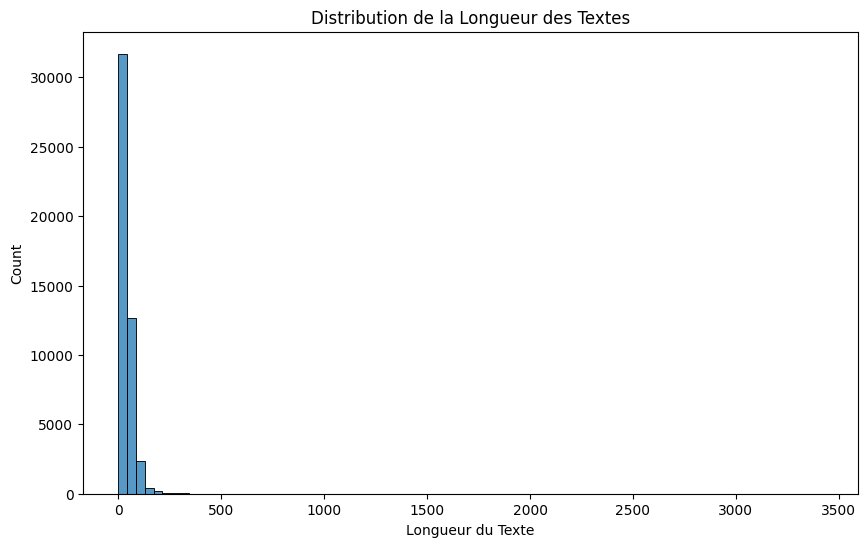

In [17]:
# Remplacer les valeurs NaN par une chaîne de caractères vide
k_en_toots_labeled['content'] = k_en_toots_labeled['content'].fillna('')

# Calcul de la longueur des textes
k_en_toots_labeled['text_length'] = k_en_toots_labeled['content'].apply(lambda x: len(x.split()))

# Visualisation
plt.figure(figsize=(10, 6))
sns.histplot(k_en_toots_labeled['text_length'], bins=80)
plt.title('Distribution de la Longueur des Textes')
plt.xlabel('Longueur du Texte')
plt.show()

# N-grams et collocations

In [18]:
# Télécharger le tokenizer 'punkt'
#nltk.download('punkt')

# S'assurer que tous les éléments sont des chaînes de caractères
#k_en_toots_labeled['content'] = k_en_toots_labeled['content'].astype(str)


# Tokenisation des mots
words = word_tokenize(" ".join(k_en_toots_labeled['preprocessed_content']))

# Identification des bigrams les plus fréquents
finder = BigramCollocationFinder.from_words(words)
finder.nbest(nltk.BigramAssocMeasures.likelihood_ratio, 10)

# Affichage des bigrams
for bigram in finder.nbest(nltk.BigramAssocMeasures.likelihood_ratio, 10):
    print(bigram)

('americanpoliticspost', 'politicspost')
('politicspost', 'americanpoliticstag')
('environmental', 'mesonet')
('appiowa', 'environmental')
('local', 'storm')
('mesonet', 'iowa')
('state', 'university')
('iowa', 'state')
('report', 'appiowa')
('storm', 'report')


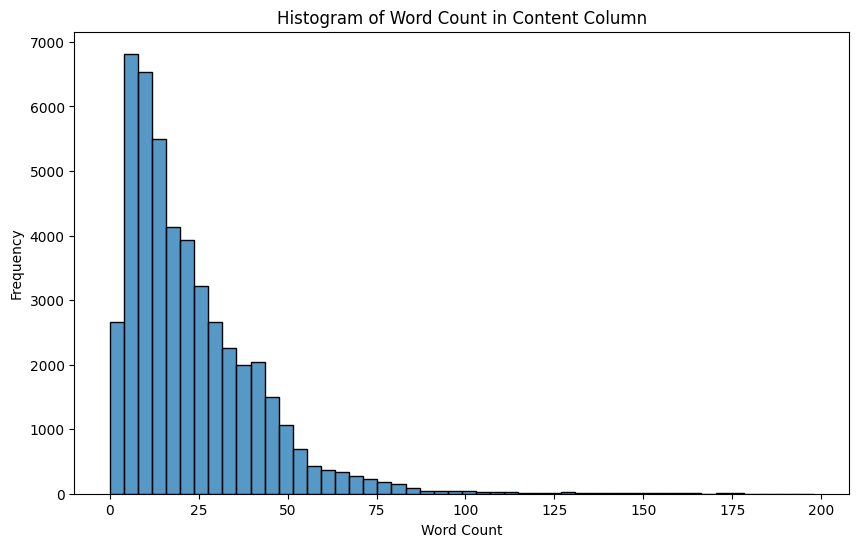

Mean word count: 22.635694707990723
Standard deviation of word count: 18.786947078323212
Top 10 Most Common Words:
new: 4773
time: 4229
jan: 4038
like: 3596
one: 3470
year: 3360
report: 3352
day: 2924
get: 2729
im: 2614


In [19]:
# Convertir le contenu en chaînes de caractères
#k_en_toots_labeled['content'] = k_en_toots_labeled['content'].astype(str)

# Tokenizer le contenu et compter les mots
k_en_toots_labeled['nb_words'] = k_en_toots_labeled['preprocessed_content'].apply(lambda x: len(x.split()))

# Filtrer les textes qui ont 200 mots ou moins
filtered_df = k_en_toots_labeled[k_en_toots_labeled['nb_words'] <= 200]

# Histogramme de Word Count
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['nb_words'], bins=50)
plt.title('Histogram of Word Count in Content Column')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Calcule de la moyenne et de l'écart type du word count
mean_word_count = filtered_df['nb_words'].mean()
std_word_count = filtered_df['nb_words'].std()
print(f"Mean word count: {mean_word_count}")
print(f"Standard deviation of word count: {std_word_count}")

# Trouver les 10 mots les plus communs
all_words = ' '.join(filtered_df['preprocessed_content'].str.lower())
words_frequency = Counter(all_words.split())
common_words = words_frequency.most_common(10)
print("Top 10 Most Common Words:")
for word, freq in common_words:
    print(f"{word}: {freq}")


# Affichage des mots les plus importants par classe en utilisant TF-IDF (Term Frequency-Inverse Document Frequency)

## Étape 1: Calcul des Scores TF-IDF

In [23]:
k_en_toots_labeled.columns


Index(['Unnamed: 0', 'id', 'language', 'created_at', 'content', 'y',
       'cleaned_content', 'preprocessed_content', 'text_length', 'nb_words'],
      dtype='object')

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# s'assurez-vous que les textes sont des chaînes de caractères et que 'y' est notre colonne de classe
#k_en_toots_labeled['content'] = k_en_toots_labeled['content'].astype(str)
y = k_en_toots_labeled['y']

# Création d'un objet TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
# Calcul du TF-IDF
X_tfidf = vectorizer.fit_transform(k_en_toots_labeled['preprocessed_content'])

# Convertion en DataFrame pour une meilleure lisibilité
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())


## Étape 2: Identifier les Mots les Plus Importants par Classe

In [32]:
# Regroupement par classe et calcul de la moyenne des scores TF-IDF
grouped = df_tfidf.groupby(y).mean()

# Pour chaque classe, trouver les mots les plus importants
for class_label in grouped.index:
    print(f"Classe {class_label}:")
    top_words = grouped.loc[class_label].sort_values(ascending=False).head(10)  # Top 10 mots
    print(top_words)
    print("\n")

Classe 0.0:
new       0.016391
like      0.014672
time      0.014441
year      0.013532
one       0.013508
report    0.013421
jan       0.013208
im        0.012852
day       0.012181
today     0.011432
Name: 0.0, dtype: float64


Classe 1.0:
like      0.017035
time      0.014747
one       0.014672
first     0.013999
report    0.013765
year      0.013319
jan       0.013302
new       0.012547
go        0.012343
im        0.012255
Name: 1.0, dtype: float64




## Étape 3: Visualisation des Mots Importants par Classe

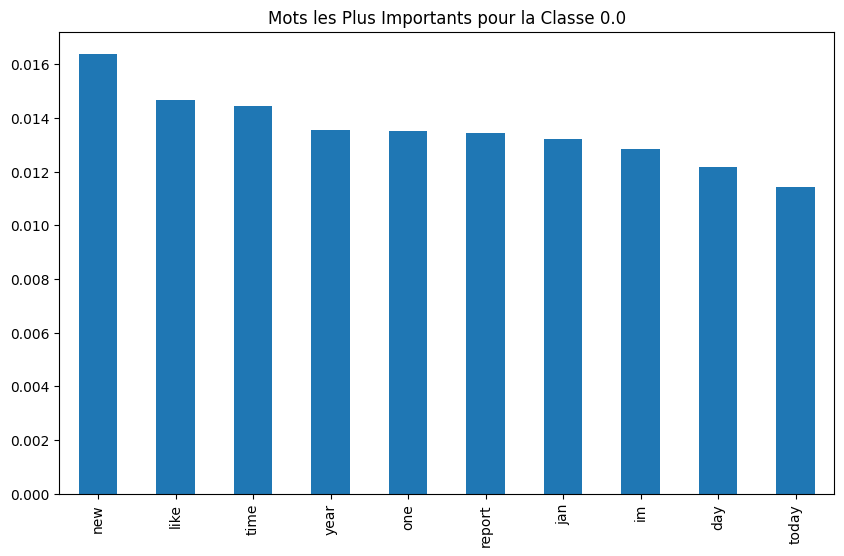

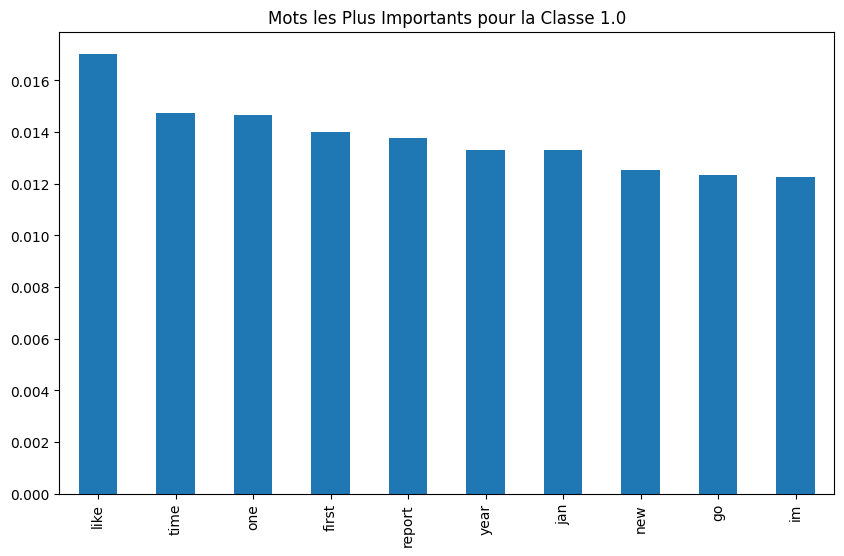

In [33]:
for class_label in grouped.index:
    plt.figure(figsize=(10, 6))
    top_words = grouped.loc[class_label].sort_values(ascending=False).head(10)  # Top 10 mots
    top_words.plot(kind='bar')
    plt.title(f'Mots les Plus Importants pour la Classe {class_label}')
    plt.show()


## Analyse de sentiments

In [34]:
from textblob import TextBlob

# Compute sentiment scores for each toot using TextBlob
k_en_toots_labeled['sentiment_score'] = k_en_toots_labeled['cleaned_content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Categorize the sentiment scores
def categorize_sentiment(score):
    if score > 0.5:
        return 'Positive'
    elif score < -0.5:
        return 'Negative'
    else:
        return 'Neutral'

k_en_toots_labeled['sentiment_category'] = k_en_toots_labeled['sentiment_score'].apply(categorize_sentiment)


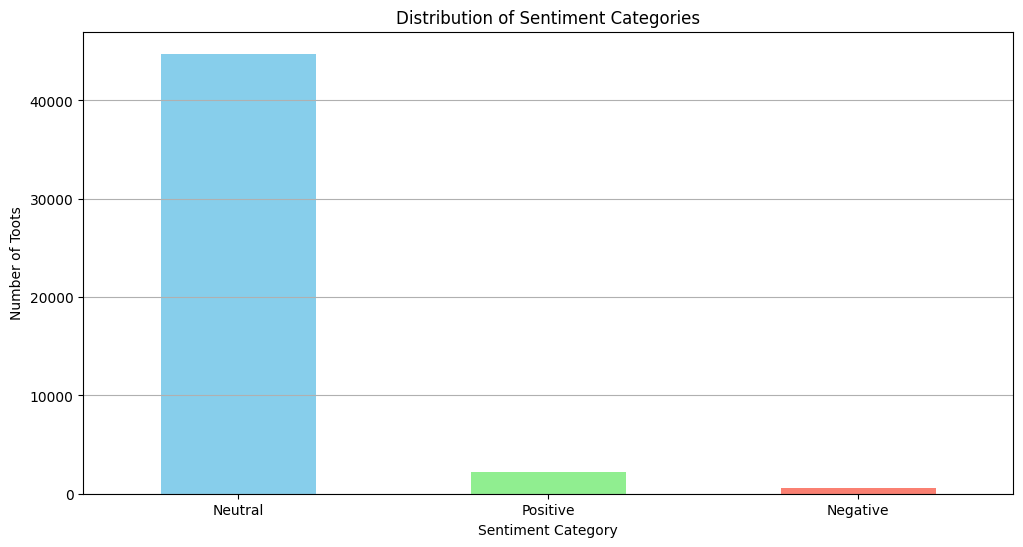

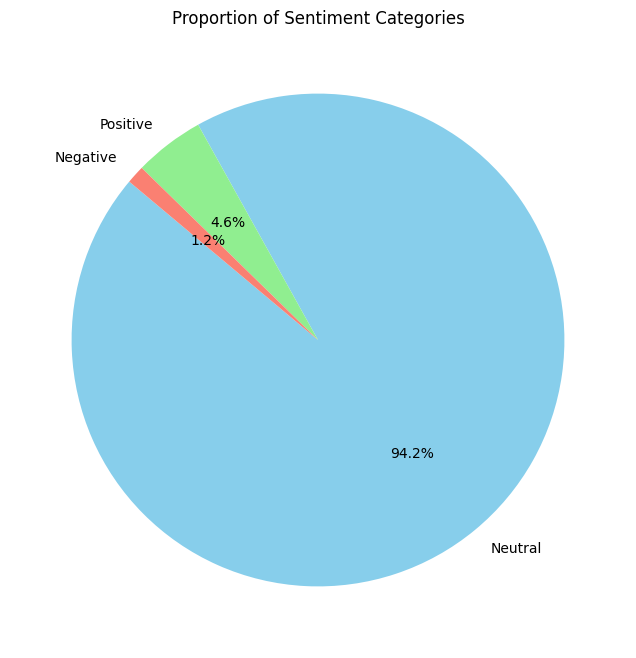

In [35]:
# Bar Plot for sentiment categories
plt.figure(figsize=(12, 6))
k_en_toots_labeled['sentiment_category'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Toots')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Pie Chart for sentiment categories
plt.figure(figsize=(8, 8))
k_en_toots_labeled['sentiment_category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Proportion of Sentiment Categories')
plt.ylabel('')
plt.show()

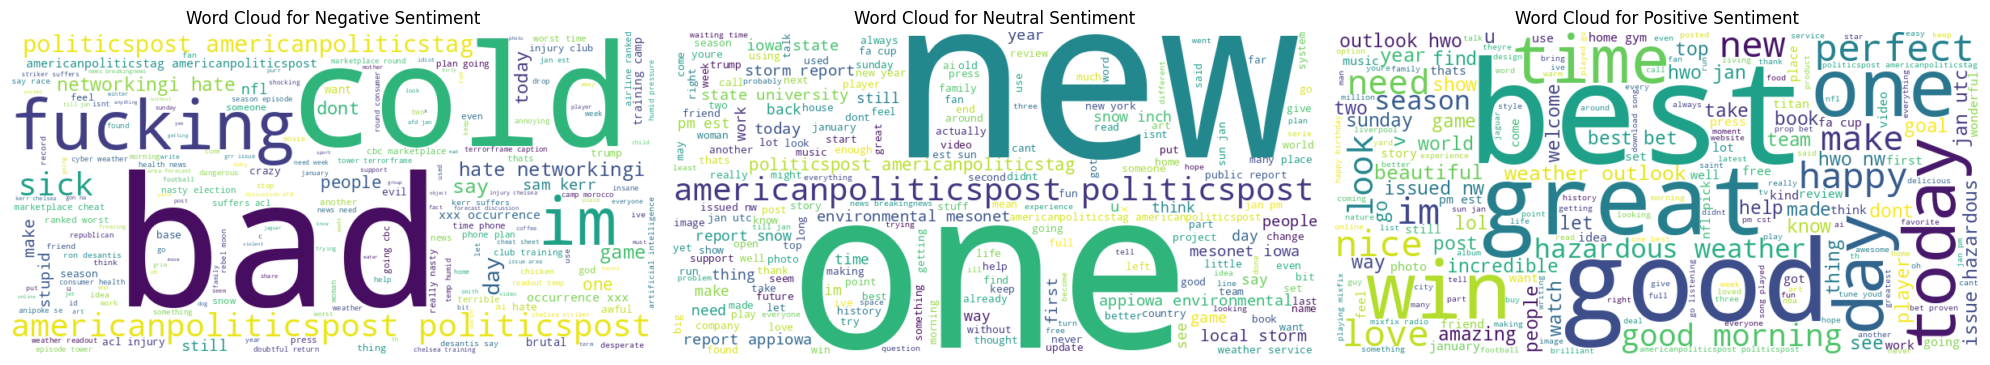

In [36]:
# Function to generate word cloud for a given sentiment category
def generate_wordcloud_for_sentiment(sentiment):
    # Filter the dataframe for the given sentiment category
    sentiment_text = ' '.join(k_en_toots_labeled[k_en_toots_labeled['sentiment_category'] == sentiment]['preprocessed_content'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text)
    return wordcloud

# Generate word clouds for each sentiment category
negative_wordcloud = generate_wordcloud_for_sentiment('Negative')
neutral_wordcloud = generate_wordcloud_for_sentiment('Neutral')
positive_wordcloud = generate_wordcloud_for_sentiment('Positive')

# Plotting the word clouds
plt.figure(figsize=(20, 12))

# Negative Sentiment Word Cloud
plt.subplot(1, 3, 1)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment')
plt.axis('off')

# Neutral Sentiment Word Cloud
plt.subplot(1, 3, 2)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Neutral Sentiment')
plt.axis('off')

# Positive Sentiment Word Cloud
plt.subplot(1, 3, 3)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off')

plt.tight_layout()
plt.show()

## Analyzing emojis

In [37]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.9/457.9 kB 4.8 MB/s eta 0:00:00


In [38]:
import emoji
def extract_emojis(s):
    return ''.join(c for c in s if c in emoji.EMOJI_DATA)
k_en_toots_labeled['emojis'] = k_en_toots_labeled['cleaned_content'].apply(extract_emojis)

all_emojis = ''.join(k_en_toots_labeled['emojis'])

# Compter la fréquence de chaque emoji
emoji_counts = Counter(all_emojis)

# Afficher les 20 emojis les plus fréquents
most_common_emojis = emoji_counts.most_common(20)
print("20 Most Frequently Used Emojis:")
for emoji, count in most_common_emojis:
    print(f"{emoji}: {count}")

20 Most Frequently Used Emojis:
🟩: 757
🟨: 267
🤔: 112
🟦: 97
🟪: 94
🤣: 89
🤘: 88
🟥: 65
‼: 59
®: 58
🤯: 54
🤩: 51
🤍: 50
🧵: 49
🥰: 46
🤷: 45
™: 41
🤦: 37
©: 33
🥶: 32


## Analyzing hashtags


In [39]:
# Extract hashtags from the 'content' column
k_en_toots_labeled['hashtags'] = k_en_toots_labeled['content'].str.findall(r'#\w+')

# Flatten the list of hashtags and count the occurrences
hashtag_counts = k_en_toots_labeled['hashtags'].explode().value_counts()

# Display the top 20 most frequently used hashtags
top_hashtags = hashtag_counts.head(20)
top_hashtags

#americanpoliticspost    2032
#politicspost            2032
#americanPoliticsTag     1976
#press                   1022
#news                     612
#breakingnews             365
#mawx                     318
#NFL                      308
#News                     285
#Ukraine                  207
#NSFW                     162
#photography              157
#pawx                     129
#art                      126
#Titans                   126
#njwx                     124
#Earthquake               122
#furconai                 121
#PAweather                118
#NYweather                118
Name: hashtags, dtype: int64

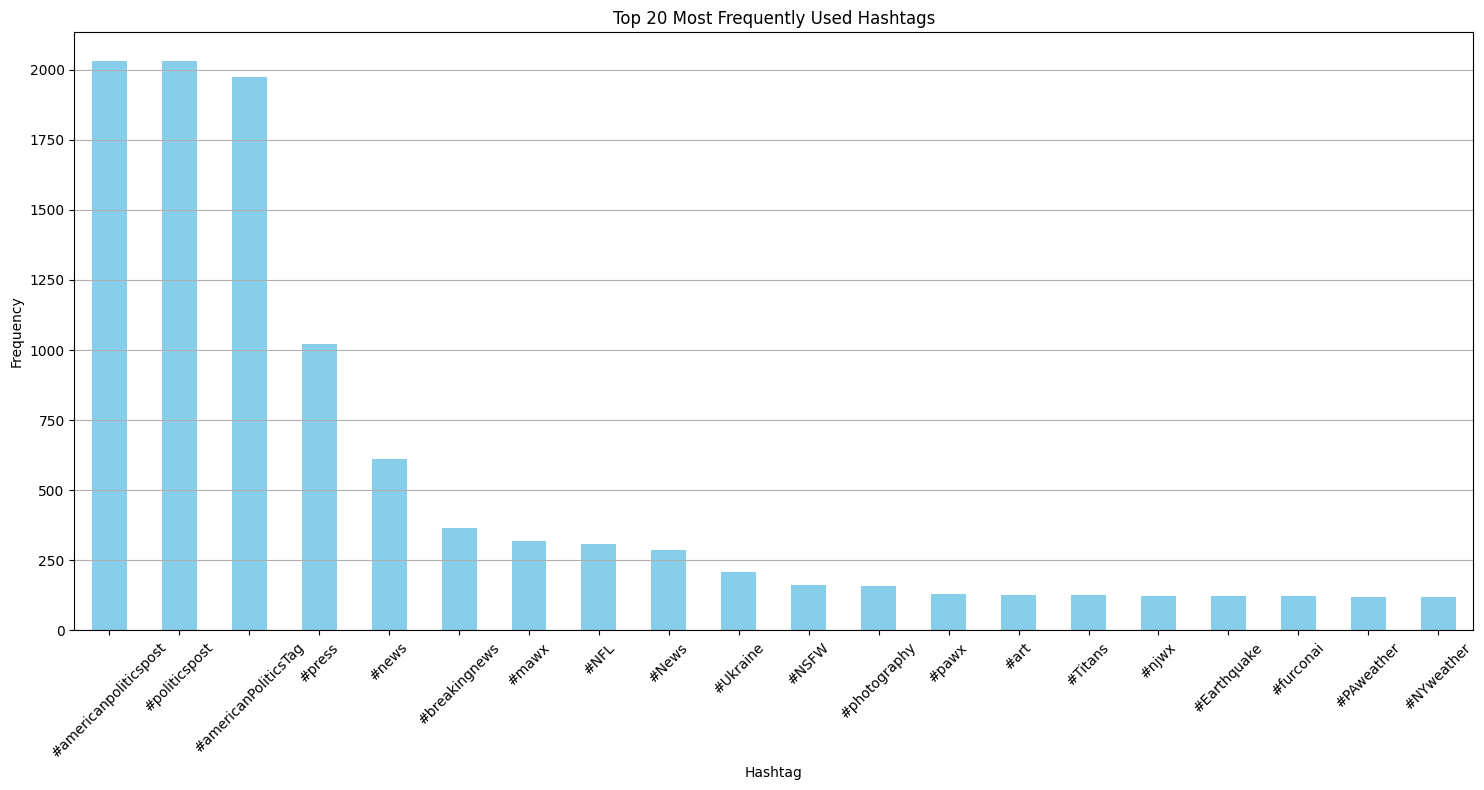

In [40]:
# Visualize the top 20 hashtags
plt.figure(figsize=(15, 8))
top_hashtags.plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Frequently Used Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()